In [51]:
print("any chance")

any chance


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from telnetlib import GA
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, f1_score, mean_absolute_percentage_error, mean_squared_error
from xgboost import XGBRegressor, plot_importance, plot_tree
from twilio.rest import Client

account_sid = 'AC2c24a6887a6eba1fa7a346380331e1e1'
auth_token = '2a77152f9c8cb363edc78b5bf8c5c601'
client = Client(account_sid, auth_token)

In [53]:
df = pd.read_excel('../curr_alcs.xlsx')

In [54]:
df['alc_percentage'] = df['alc_percentage'].astype(float)
df['if_sweet'] = df['if_sweet'].astype(bool)
df['rank'] = df['rank'].astype(int)
df['if_fruit_on_bottle'] = df['if_fruit_on_bottle'].astype(bool)
df['if_citrus'] = df['if_citrus'].astype(bool)
df['if_cinnamon'] = df['if_cinnamon'].astype(bool)
df['shooter_plastic'] = df['shooter_plastic'].astype(bool)
df = pd.get_dummies(data=df, columns=['type', 'brand', 'color'], dtype=bool)
target_shot = df[df['rank'] == 0]
df = df[df['rank'] != -1]
df = df[df['rank'] != 0]

In [55]:
if int(target_shot.shape[0]) > 1:
    raise ValueError("you sure you want to predict more than one at a time?")
    
df = df.drop(['name'], axis=1)

target = 'rank'
features = df.dtypes[(df.columns != target)].index 

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=38)

In [56]:
model = XGBRegressor()

In [57]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [58]:
score = mean_squared_error(y_test, y_pred)
print("mean_squared_error:", score)

mean_squared_error: 14.400373312874772


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

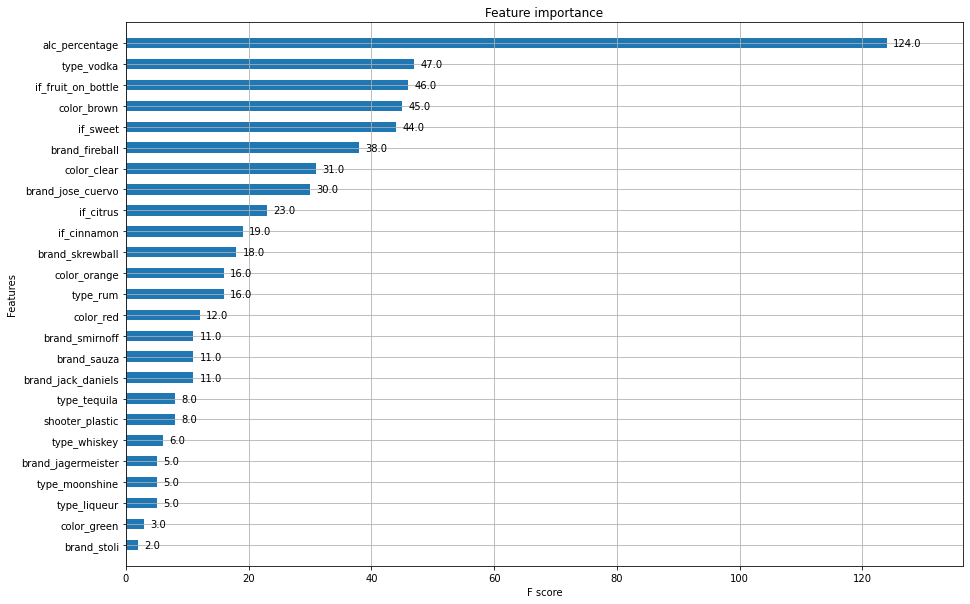

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_importance(model, height=0.5, ax=ax)

In [60]:
if int(target_shot.shape[0]) != 0:
    shot_name = str(target_shot['name'].iat[0])
    target_shot = target_shot.drop(['name', 'rank'], axis=1)
    predicted_val_raw = model.predict(target_shot)
    predicted_val = int(round(predicted_val_raw[0])) 
    print("final prediction for {}: {}".format(shot_name, predicted_val))

else:
    print("no shots found to predict")

no shots found to predict
